In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, linregress, f_oneway

In [2]:
merge10 = pd.read_csv('Cleaned_DF.csv')
merge10.drop('Unnamed: 0', axis=1, inplace=True)
merge10.head()

,StudentNumber,DPS_HomeLg,CYI_Lat,CYI_Deg,Disability,GT_C,FRL_C,Sect504_C,SPED_C,NumYears,CSAPR3,CSAPR4,CSAPR5,CSAPR6,CSAPR7,CSAPR8,CSAPR9,CSAPR10,CSAPM3,CSAPM4,CSAPM5,CSAPM6,CSAPM7,CSAPM8,CSAPM9,CSAPM10,CSAPW3,CSAPW4,CSAPW5,CSAPW6,CSAPW7,CSAPW8,CSAPW9,CSAPW10,SELE0,SELE1,SELE2,SELE3,SELE4,SELE5,SRE0,SRE1,SRE2,SRE3,SRE4,SRE5,SRE6,SRE7,SRE8,SRE9,SRE10,SRE11,SRE12,GT0,GT1,GT2,GT3,GT4,GT5,GT6,GT7,GT8,GT9,GT10,GT11,GT12,FRL0,FRL1,FRL2,FRL3,FRL4,FRL5,FRL6,FRL7,FRL8,FRL9,FRL10,FRL11,FRL12,S5040,S5041,S5042,S5043,S5044,S5045,S5046,S5047,S5048,S5049,S50410,S50411,S50412,SPED0,SPED1,SPED2,SPED3,SPED4,SPED5,SPED6,SPED7,SPED8,SPED9,SPED10,SPED11,SPED12
0,401551,English,1.0,1.0,0.0,0.0,1.0,0.100000,0.800000,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN
1,401568,English,NaN,NaN,1.0,0.0,1.0,0.111111,0.666667,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,NaN
2,405587,English,1.0,1.0,0.0,0.0,1.0,0.100000,0.800000,9.0,NaN,414.0,220.0,260.0,503.0,537.0,559.0,597.0,NaN,NaN,282.0,448.0,467.0,480.0,469.0,505.0,NaN,333.0,383.0,392.0,395.0,488.0,458.0,440.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
3,415101,English,NaN,NaN,1.0,0.0,1.0,0.100000,0.800000,7.0,NaN,NaN,NaN,260.0,NaN,NaN,NaN,550.0,NaN,NaN,NaN,271.0,NaN,NaN,NaN,441.0,NaN,NaN,NaN,343.0,NaN,NaN,NaN,405.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN
4,417458,English,1.0,0.0,1.0,0.0,0.0,0.090909,0.818182,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN


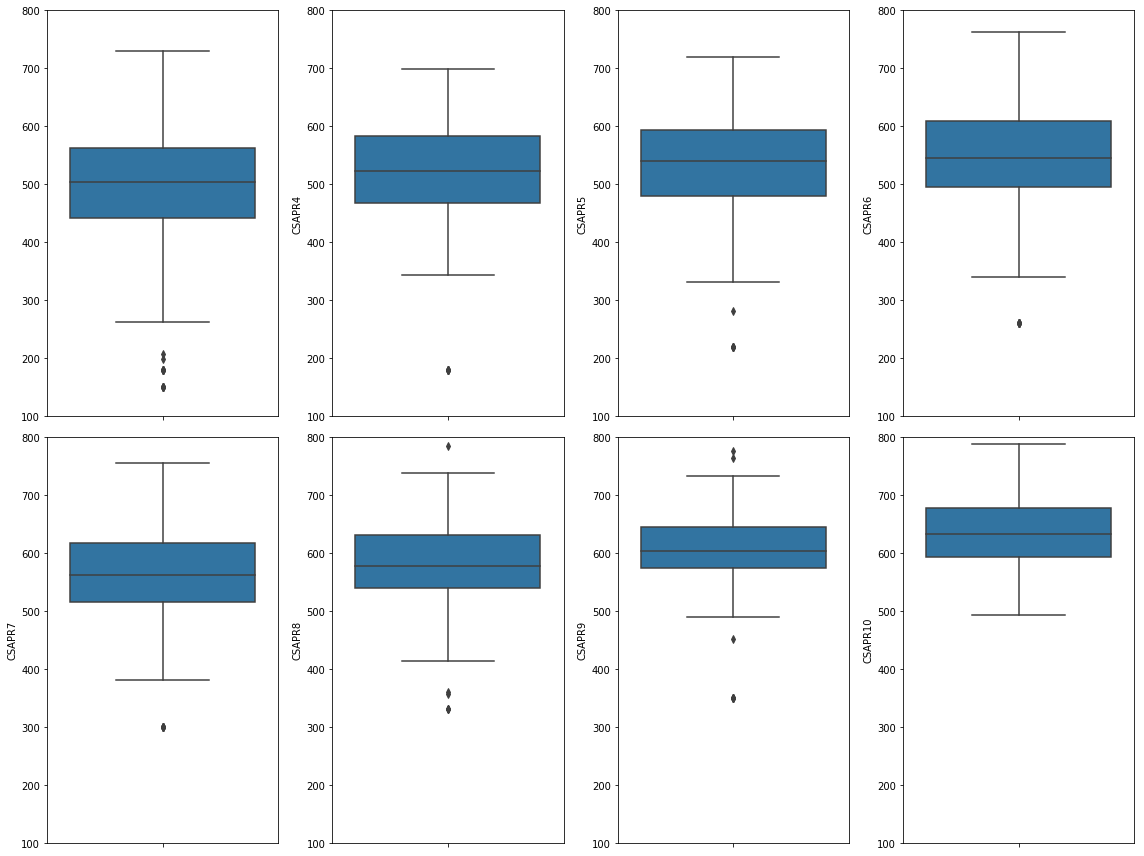

In [3]:
fig,axes=plt.subplots(2,4,figsize=(16,12))
#axes.set_ylim([100,800])
sns.boxplot(y=['CSAPR3','CSAPR4'],data=merge10, ax=axes[0,0])
sns.boxplot(y='CSAPR4',data=merge10, ax=axes[0,1])
sns.boxplot(y='CSAPR5',data=merge10, ax=axes[0,2])
sns.boxplot(y='CSAPR6',data=merge10, ax=axes[0,3])
sns.boxplot(y='CSAPR7',data=merge10, ax=axes[1,0])
sns.boxplot(y='CSAPR8',data=merge10, ax=axes[1,1])
sns.boxplot(y='CSAPR9',data=merge10, ax=axes[1,2])
sns.boxplot(y='CSAPR10',data=merge10, ax=axes[1,3])
axes[0,0].set_ylim(100,800)
axes[0,1].set_ylim(100,800)
axes[0,2].set_ylim(100,800)
axes[0,3].set_ylim(100,800)
axes[1,0].set_ylim(100,800)
axes[1,1].set_ylim(100,800)
axes[1,2].set_ylim(100,800)
axes[1,3].set_ylim(100,800)
plt.tight_layout()
plt.show()

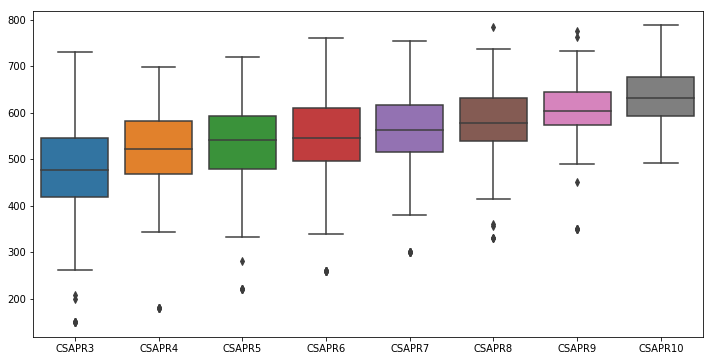

In [4]:
box = ['CSAPR3','CSAPR4','CSAPR5','CSAPR6','CSAPR7','CSAPR8','CSAPR9','CSAPR10']
grades = merge10[box]
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(data=grades)

In [5]:
F, p = f_oneway(grades.CSAPR3.dropna(), grades.CSAPR4.dropna(), grades.CSAPR5.dropna(), 
                grades.CSAPR6.dropna(), grades.CSAPR7.dropna(), grades.CSAPR8.dropna(), 
                grades.CSAPR9.dropna(), grades.CSAPR10.dropna())
print(F,p)

48.361720873200085 5.848696583193879e-62


In [6]:
CSAP = pd.melt(merge10, value_vars=box, id_vars='DPS_HomeLg', value_name='CSAP Reading')
CSAP = CSAP.dropna()
CSAP['grade'] = CSAP['variable'].str[-1].astype('int')
CSAP['eng'] = CSAP['DPS_HomeLg']==' English'
CSAP['eng'] *= 1
#CSAP

In [7]:
slope, intercept, r_value, p_value, std_err = linregress(CSAP.grade, CSAP['CSAP Reading'])
print(r_value**2, p_value)

0.017170313977198735 5.629158648602011e-07


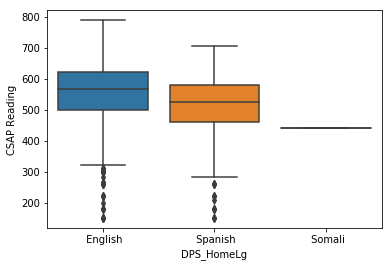

In [8]:
CSAP['CSAP Reading'] = CSAP['CSAP Reading'].astype('int')
ax = sns.boxplot(y='CSAP Reading', x='DPS_HomeLg', data=CSAP)
#CSAP

In [9]:
slope, intercept, r_value, p_value, std_err = linregress(CSAP.eng, CSAP['CSAP Reading'])
print(r_value**2, p_value)

0.037417150327410865 1.1313724747502164e-13


In [10]:
som = merge10[merge10.DPS_HomeLg==' Somali']
som

,StudentNumber,DPS_HomeLg,CYI_Lat,CYI_Deg,Disability,GT_C,FRL_C,Sect504_C,SPED_C,NumYears,CSAPR3,CSAPR4,CSAPR5,CSAPR6,CSAPR7,CSAPR8,CSAPR9,CSAPR10,CSAPM3,CSAPM4,CSAPM5,CSAPM6,CSAPM7,CSAPM8,CSAPM9,CSAPM10,CSAPW3,CSAPW4,CSAPW5,CSAPW6,CSAPW7,CSAPW8,CSAPW9,CSAPW10,SELE0,SELE1,SELE2,SELE3,SELE4,SELE5,SRE0,SRE1,SRE2,SRE3,SRE4,SRE5,SRE6,SRE7,SRE8,SRE9,SRE10,SRE11,SRE12,GT0,GT1,GT2,GT3,GT4,GT5,GT6,GT7,GT8,GT9,GT10,GT11,GT12,FRL0,FRL1,FRL2,FRL3,FRL4,FRL5,FRL6,FRL7,FRL8,FRL9,FRL10,FRL11,FRL12,S5040,S5041,S5042,S5043,S5044,S5045,S5046,S5047,S5048,S5049,S50410,S50411,S50412,SPED0,SPED1,SPED2,SPED3,SPED4,SPED5,SPED6,SPED7,SPED8,SPED9,SPED10,SPED11,SPED12
532,788122,Somali,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,439.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,407.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,386.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,152.0,379.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


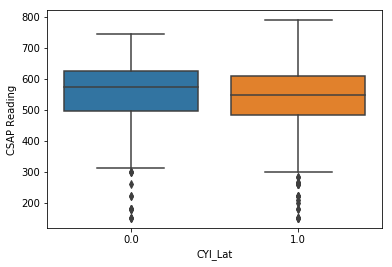

In [11]:
CSAP = pd.melt(merge10, value_vars=box, id_vars='CYI_Lat', value_name='CSAP Reading')
CSAP = CSAP.dropna()
CSAP['CSAP Reading'] = CSAP['CSAP Reading'].astype('int')
ax = sns.boxplot(y='CSAP Reading', x='CYI_Lat', data=CSAP)
#CSAP

In [12]:
uni = CSAP[CSAP['CYI_Lat']==0]
bi = CSAP[CSAP['CYI_Lat']==1]
t_stat, p_val = ttest_ind(uni['CSAP Reading'], bi['CSAP Reading'], equal_var=False)
print(t_stat, p_val)

1.569192123860049 0.11717506185122578


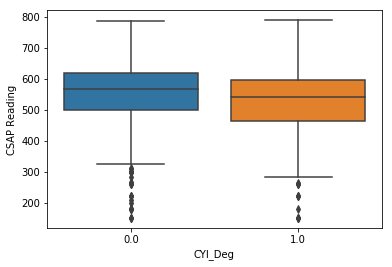

In [13]:
CSAP = pd.melt(merge10, value_vars=box, id_vars='CYI_Deg', value_name='CSAP Reading')
CSAP = CSAP.dropna()
CSAP['CSAP Reading'] = CSAP['CSAP Reading'].astype('int')
ax = sns.boxplot(y='CSAP Reading', x='CYI_Deg', data=CSAP)


In [14]:
mm = CSAP[CSAP['CYI_Deg']==0]
sp = CSAP[CSAP['CYI_Deg']==1]
t_stat, p_val = ttest_ind(mm['CSAP Reading'], sp['CSAP Reading'], equal_var=False)
print(t_stat, p_val)

3.937190763541652 9.18545852396114e-05


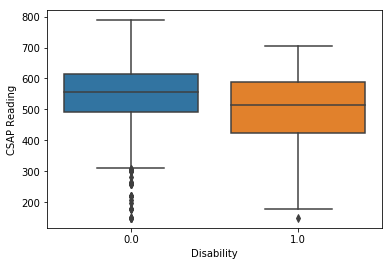

In [15]:
CSAP = pd.melt(merge10, value_vars=box, id_vars='Disability', value_name='CSAP Reading')
CSAP = CSAP.dropna()
CSAP['CSAP Reading'] = CSAP['CSAP Reading'].astype('int')
ax = sns.boxplot(y='CSAP Reading', x='Disability', data=CSAP)

In [16]:
ho = CSAP[CSAP['Disability']==0]
od = CSAP[CSAP['Disability']==1]
t_stat, p_val = ttest_ind(ho['CSAP Reading'], od['CSAP Reading'], equal_var=False)
print(t_stat, p_val)

4.608146950576617 8.454466036425599e-06


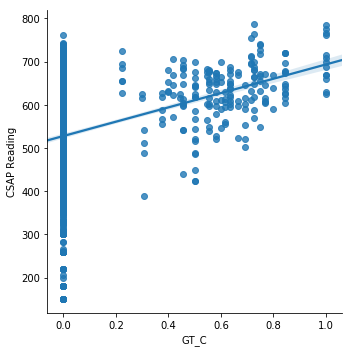

In [17]:
CSAP = pd.melt(merge10, value_vars=box, id_vars='GT_C', value_name = 'CSAP Reading')
CSAP = CSAP.dropna()
ax = sns.lmplot(x='GT_C', y = 'CSAP Reading', data = CSAP)
#CSAP

In [18]:
slope, intercept, r_value, p_value, std_err = linregress(CSAP.GT_C, CSAP['CSAP Reading'])
print(r_value**2, p_value)

0.11901766884203019 9.841630737481745e-42


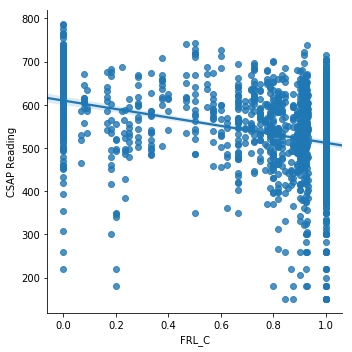

In [19]:
CSAP = pd.melt(merge10, value_vars=box, id_vars='FRL_C', value_name='CSAP Reading')
CSAP = CSAP.dropna()
ax = sns.lmplot(x='FRL_C', y = 'CSAP Reading', data = CSAP)

In [20]:
slope, intercept, r_value, p_value, std_err = linregress(CSAP.FRL_C, CSAP['CSAP Reading'])
print(r_value**2, p_value)

0.11895876987644445 1.0331540499687681e-41


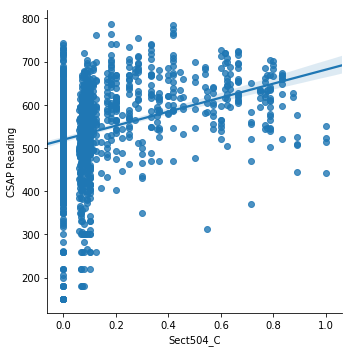

In [21]:
CSAP = pd.melt(merge10, value_vars=box, id_vars='Sect504_C', value_name='CSAP Reading')
CSAP = CSAP.dropna()
ax = sns.lmplot(x='Sect504_C', y = 'CSAP Reading', data = CSAP)

In [22]:
slope, intercept, r_value, p_value, std_err = linregress(CSAP.Sect504_C, CSAP['CSAP Reading'])
print(r_value**2, p_value)

0.10387210831963954 2.3685767231908222e-36


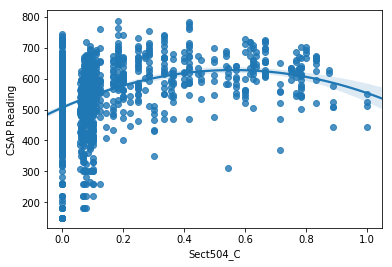

In [23]:
ax = sns.regplot(x='Sect504_C', y = 'CSAP Reading', data = CSAP, order=2)

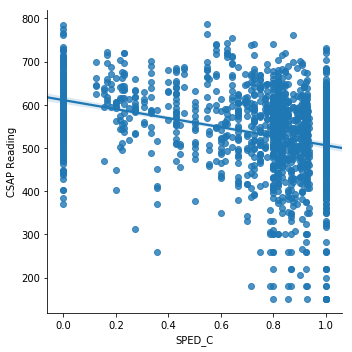

In [24]:
CSAP = pd.melt(merge10, value_vars=box, id_vars='SPED_C', value_name='CSAP Reading')
CSAP = CSAP.dropna()
ax = sns.lmplot(x='SPED_C', y = 'CSAP Reading', data = CSAP)

In [25]:
slope, intercept, r_value, p_value, std_err = linregress(CSAP.SPED_C, CSAP['CSAP Reading'])
print(r_value**2, p_value)

0.11609926523792494 1.0885257204083757e-40
